In [1]:
from pylab import *


Open a datafile

We have performed a tomography experiment with 100 experimental cycles per datapoint.

The result are thus 100 accumulated PMT counts. One for each detection cycle. 

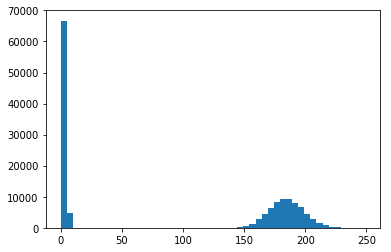

In [90]:
counts = np.loadtxt('qc2157.raw')
a = hist(counts.flatten(), bins=50)


We can see a clear separation between bright $|S\rangle$ and dark $|S\rangle$ states. 

Let's assign the states with a threshold:

In [83]:
thresh = 70
bright_array = counts > thresh
probs= np.sum(bright_array,1) / float(bright_array.shape[1])
probs.shape

(1396,)

The first three datapoints of the dataset correspond to 
1. No manipulation, measurement (in z basis)
2. $\pi /2$ rotation around the x axis
3. $\pi /2$ rotation around the y axis

This corresponds to a state tomography of the ground state

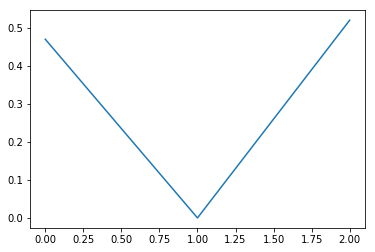

In [91]:
#dat = probs[:3]
dat = probs[[1,3,4]]

plot(dat)


We will now define the Pauli matrices and the measurement operators

In [92]:
from qutip import *
meas_op = [sigmaz(),sigmay(),sigmax()]

Now we will reconstruct the desnity matrix. Each measurement corresponds to a measured Pauli expectation value.

We start with the state that has all expectation values equal to zero and build the matrix up from that

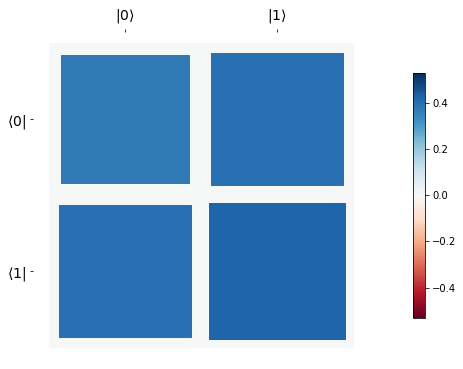

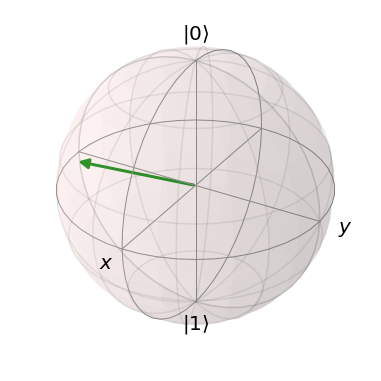

In [93]:
exp_vals = 2*dat-1
rho = 1/2. * qeye(2)
for e_val, pauli in zip(exp_vals, meas_op):
    rho += 1/2. * e_val * pauli
hinton(rho)
b = qutip.Bloch()
b.add_states(rho)
b.show()

This looks pretty close to the ground state. Let's do a few sanity checks:

In [94]:
length = 0
for pauli in meas_op:
    length += expect(pauli,rho)**2

length = sqrt(length) 
print(length)

1.0025966287595427


In [75]:
energ = rho.eigenenergies()
estates = rho.eigenstates()
print(energ)

[-0.00129831  1.00129831]


In [95]:
rho_pos = Qobj(zeros([2,2]))
for i in range(2):
    if energ[i] > 0:
        rho_pos += ket2dm(estates[1][i])*energ[i]

rho_pos = rho_pos / sum(rho_pos.eigenenergies())


This state is not physical!!! Positivity is not given, this state would yield a negative probability for the measurement corresponding to the negative eigenvalue

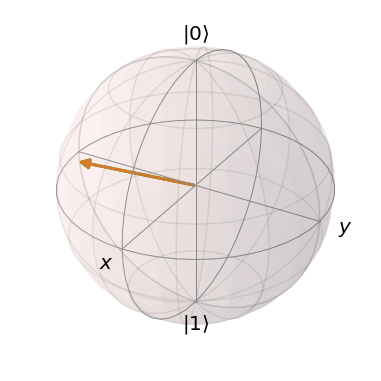

In [77]:
b = Bloch()
b.add_states(rho)
b.add_states(rho_pos)
b.show()

In [80]:
ideal = -sigmay()
print(qutip.fidelity(ideal,rho_pos))
print(qutip.fidelity(ideal,rho))


0.9987042147215607
1.0354279431758058
